In [1]:
from sqlalchemy.sql.functions import random

import streamlit

AttributeError: partially initialized module 'streamlit' has no attribute 'title' (most likely due to a circular import)

In [ ]:
# Required imports
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.transforms import functional as F
from torch.utils.data import DataLoader, Dataset
from PIL import Image

# Define a custom dataset class for your own data
class CustomDataset(Dataset):
    def __init__(self, image_paths, annotations, transforms=None):
        """
        Args:
            image_paths (list): List of paths to images.
            annotations (list): List of annotations (bounding boxes/labels).
            transforms (callable, optional): A function/transform to apply to the images and targets.
        """
        self.image_paths = image_paths
        self.annotations = annotations
        self.transforms = transforms

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Read the image using PIL
        img = Image.open(self.image_paths[idx]).convert("RGB")
        target = self.annotations[idx]

        # Convert from PIL image to tensor
        img = F.to_tensor(img)

        # Apply transformations if specified
        if self.transforms is not None:
            img = self.transforms(img)

        return img, target

# Function to modify the pretrained Faster R-CNN model
def get_model(num_classes):
    # Load a pretrained Faster R-CNN model
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

    # Get the number of input features for the classifier and replace the head
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

# Hyperparameters & setup
NUM_CLASSES = 2  # 1 class (your real dataset) + background
BATCH_SIZE = 4
LEARNING_RATE = 0.005
NUM_EPOCHS = 10

# Prepare dataset
image_paths = ["path_to_img1.jpg", "path_to_img2.jpg"]  # Replace with your actual image paths
annotations = [  # Replace with your dataset's annotations
    {"boxes": torch.tensor([[10, 20, 30, 40]], dtype=torch.float32), "labels": torch.tensor([1])},
    {"boxes": torch.tensor([[15, 25, 35, 45]], dtype=torch.float32), "labels": torch.tensor([1])},
]
dataset = CustomDataset(image_paths, annotations)

# DataLoader for batching
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

# Load the model and optimizer
model = get_model(NUM_CLASSES)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9, weight_decay=0.0005)

# Training loop
model.train()
for epoch in range(NUM_EPOCHS):
    for images, targets in data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        loss_dict = model(images, targets)

        # Sum up all the losses
        losses = sum(loss for loss in loss_dict.values())

        # Backpropagation
        losses.backward()
        optimizer.step()

    print(f"Epoch {epoch}/{NUM_EPOCHS}, Loss: {losses.item()}")

In [2]:
# Required imports
import torch
import torchvision
from torchvision.transforms import functional as F
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from PIL import Image

# Function to modify the pretrained Faster R-CNN model
def get_model(num_classes):
    # Load a pretrained Faster R-CNN model
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

    # Get the number of input features for the classifier and replace the head
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

# Prepare the model
NUM_CLASSES = 2  # 1 class (for objects you want to detect) + background
model = get_model(NUM_CLASSES)

# Load the model onto the appropriate device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Load your own image dataset
image_paths = ["path_to_img1.jpg", "path_to_img2.jpg"]  # Replace with your image paths

# Create dummy annotations (necessary for training)
# Here, we use a dummy box and label for every image
dummy_annotations = [
    {"boxes": torch.tensor([[0, 0, 10, 10]], dtype=torch.float32), "labels": torch.tensor([1])}
    for _ in image_paths
]

# Convert dataset into a custom Dataset instance
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, annotations, transforms=None):
        self.image_paths = image_paths
        self.annotations = annotations
        self.transforms = transforms

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert("RGB")
        target = self.annotations[idx]
        img = F.to_tensor(img)  # Convert image to tensor

        # Apply transformations, if needed
        if self.transforms:
            img = self.transforms(img)

        return img, target

# Create the dataset and DataLoader
dummy_dataset = CustomDataset(image_paths, dummy_annotations)
data_loader = torch.utils.data.DataLoader(dummy_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

# Set up the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# Training loop
model.train()
NUM_EPOCHS = 5
for epoch in range(NUM_EPOCHS):
    for images, targets in data_loader:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        loss_dict = model(images, targets)

        # Compute total loss
        losses = sum(loss for loss in loss_dict.values())

        # Backward pass
        losses.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{NUM_EPOCHS}, Loss: {losses.item()}")

# Save the model after training
torch.save(model.state_dict(), "faster_rcnn_no_annotations.pth")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\au783153\\Documents\\OBM\\CODES\\HeathlandSpeciesClassifier\\path_to_img1.jpg'

In [10]:
from datetime import datetime

# Add a timestamp to the training log
current_time = datetime.now().strftime("%Y-%m-%d %H:%M")

In [15]:
import matplotlib.pyplot as plt
import random

# Generate random positive real values for lists
train_loss = [random.uniform(0.1, 1.0) for _ in range(10)]
train_acc = [random.uniform(70.0, 90.0) for _ in range(10)]
test_acc = [random.uniform(65.0, 85.0) for _ in range(10)]

print("Train Loss:", train_loss)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Loss: [0.3103355367701395, 0.3746281990048984, 0.18340238751930066, 0.9161068281358441, 0.7831723389134567, 0.5963939396262943, 0.4821857152740938, 0.9528810070414723, 0.3777576713251156, 0.4657898929106279]
Train Accuracy: [86.78787511685952, 86.14442554829736, 80.98951462611942, 80.57054998468794, 83.07948686132362, 85.48854971228235, 79.05622504877425, 73.29054878302885, 87.31564872015669, 80.11686884397517]
Test Accuracy: [70.97767872406263, 71.64173285188677, 74.36031048322006, 74.18734423181198, 71.24342320685385, 66.72756080192907, 69.4811674761378, 69.62169167341858, 72.81390017890132, 81.11370024883874]


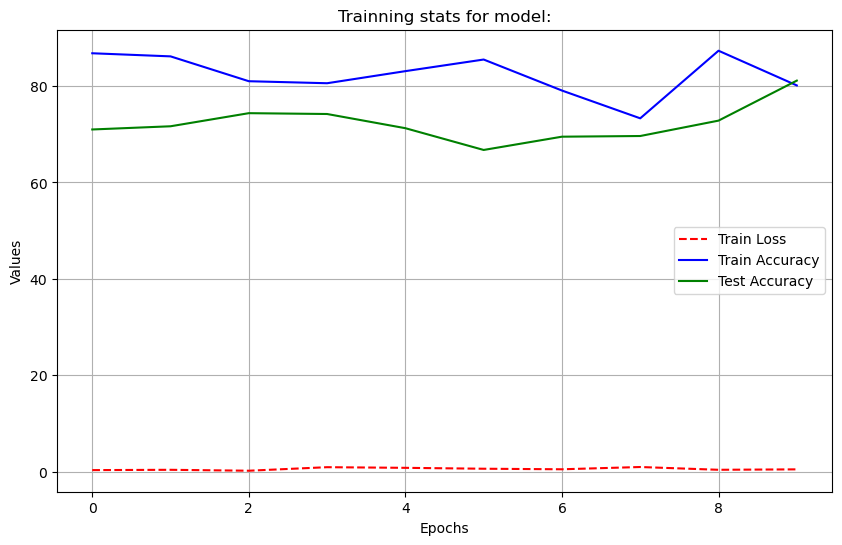

In [18]:
plt.figure(figsize=(10, 6))

# Plot Train Loss
plt.plot(range(len(train_loss)), train_loss, label='Train Loss', color='red', linestyle='--')

# Plot Train Accuracy
plt.plot(range(len(train_acc)), train_acc, label='Train Accuracy', color='blue')

# Plot Test Accuracy
plt.plot(range(len(test_acc)), test_acc, label='Test Accuracy', color='green')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Trainning stats for model:')

# Show legend
plt.legend()

# Add grid
plt.grid(True)

# Save the plot as a PDF file
plt.savefig("allo.pdf", format='pdf')